In [2]:
import torch
import torch.nn as nn
from torch.utils.data.dataloader import DataLoader
from torch.optim.adam import Adam
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomCrop, RandomHorizontalFlip, Normalize
import torchvision.transforms as T

In [9]:
transforms = Compose([
    RandomCrop((32, 32), padding= 4),
    RandomHorizontalFlip(p= 0.5),
    T.ToTensor(),
    Normalize(mean= (0.4914, 0.4822, 0.4465), std= (0.247, 0.243, 0.261))
])

train_data = CIFAR10(root= './', train= True, transform= transforms, download= True)
test_data = CIFAR10(root= './', train= False, transform= transforms, download= True)

In [10]:
train_loader = DataLoader(train_data, batch_size= 32, shuffle= True) 
test_loader = DataLoader(test_data, batch_size= 32, shuffle= False)

In [11]:
img_data = iter(train_loader)
images, labels = next(img_data)
images.shape

torch.Size([32, 3, 32, 32])

In [12]:
img_data = images[7]

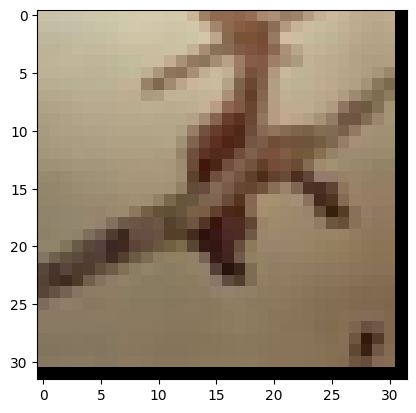

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def denomalize(img, mean, std):
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    return img * std + mean

def View_img(image):
    mean = (0.4914, 0.4822, 0.4465)
    std = (0.247, 0.243, 0.261)

    img_data = denomalize(image, mean, std)
    img_data = img_data.numpy()
    plt.imshow(np.transpose(img_data, (1, 2, 0)))
    plt.show()

View_img(images[0])

In [ ]:
class BasicBlock(nn.module):
    def __init__(self, in_channels, out_channels, hidden_dim):
        super(BasicBlock, self).__init__()
        